<a href="https://colab.research.google.com/github/manavavi/ML/blob/master/Marketing_Campaign_for_Banking_Products(2)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Information on features:-**

Marketing Campaign for Banking Products.ipynb_
Information on features:-

The attributes can be divided into differenct categories:

The attributes ID does not provide much information for Loan so we can neglact it for model prediction.

    1.Binary Class:- There are 5 attributes belong to this class
        Personal Loan :- This is our target variable. It state that does the customer accept the loan offered in past.
        Security Account:- Does coutomer has security account with bank?
        CD Account:- Does the customer have a certificate of deposit (CD) account with the bank?
        Online:- Does the customer use internet banking facilities?
        Credit Card:- Does the customer use a credit card issued by UniversalBank?

    2.Interval variable:-
        Age
        Experiance
        Income
        CCAvg
        Mortages

    3.Ordinal Categorical variable:-
        Family
        Education

    4.The Nominal Variable is:-
        ID
        Zip Coad

Since we observe that the minimum value of Experiance is in negative but we know that the experiance can't be negative so we have to clear the data.

There are 52 row in which the value of experiance is nagative. So we clean all these 52 row of data set.
Influence of income and Education on personal loan







**Importing all  libraries**





In [689]:
import math
from datetime import datetime
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import precision_score, recall_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

%matplotlib inline                                


**File upload and importing datasets**

In [690]:

from google.colab import files 
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling (3).csv


In [691]:
dataset = pd.read_csv('/content/Bank_Personal_Loan_Modelling.csv')

***Checking datatype, Statistical summary, Shape, Nullvalues etc & Data cleaning ***

In [692]:
dataset.shape


(5000, 14)

In [693]:
 pd.read_csv('Bank_Personal_Loan_Modelling.csv')

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [694]:
dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [695]:
dataset.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [696]:
for column in data.columns:
    print(f' Unique values in {column} is {len(data[column].unique())}')

 Unique values in Age is 45
 Unique values in Experience is 44
 Unique values in Income is 162
 Unique values in ZIP Code is 467
 Unique values in Family is 4
 Unique values in CCAvg is 108
 Unique values in Education is 3
 Unique values in Mortgage is 347
 Unique values in Personal Loan is 2
 Unique values in Securities Account is 2
 Unique values in CD Account is 2
 Unique values in Online is 2
 Unique values in CreditCard is 2


In [697]:
dataset['Age'].unique()

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23])

In [698]:
dataset['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [699]:
dataset['Income'].unique()

array([ 49,  34,  11, 100,  45,  29,  72,  22,  81, 180, 105, 114,  40,
       112, 130, 193,  21,  25,  63,  62,  43, 152,  83, 158,  48, 119,
        35,  41,  18,  50, 121,  71, 141,  80,  84,  60, 132, 104,  52,
       194,   8, 131, 190,  44, 139,  93, 188,  39, 125,  32,  20, 115,
        69,  85, 135,  12, 133,  19,  82, 109,  42,  78,  51, 113, 118,
        64, 161,  94,  15,  74,  30,  38,   9,  92,  61,  73,  70, 149,
        98, 128,  31,  58,  54, 124, 163,  24,  79, 134,  23,  13, 138,
       171, 168,  65,  10, 148, 159, 169, 144, 165,  59,  68,  91, 172,
        55, 155,  53,  89,  28,  75, 170, 120,  99, 111,  33, 129, 122,
       150, 195, 110, 101, 191, 140, 153, 173, 174,  90, 179, 145, 200,
       183, 182,  88, 160, 205, 164,  14, 175, 103, 108, 185, 204, 154,
       102, 192, 202, 162, 142,  95, 184, 181, 143, 123, 178, 198, 201,
       203, 189, 151, 199, 224, 218])

In [700]:
dataset['ZIP Code'].unique()

array([91107, 90089, 94720, 94112, 91330, 92121, 91711, 93943, 93023,
       94710, 90277, 93106, 94920, 91741, 95054, 95010, 94305, 91604,
       94015, 90095, 91320, 95521, 95064, 90064, 94539, 94104, 94117,
       94801, 94035, 92647, 95814, 94114, 94115, 92672, 94122, 90019,
       95616, 94065, 95014, 91380, 95747, 92373, 92093, 94005, 90245,
       95819, 94022, 90404, 93407, 94523, 90024, 91360, 95670, 95123,
       90045, 91335, 93907, 92007, 94606, 94611, 94901, 92220, 93305,
       95134, 94612, 92507, 91730, 94501, 94303, 94105, 94550, 92612,
       95617, 92374, 94080, 94608, 93555, 93311, 94704, 92717, 92037,
       95136, 94542, 94143, 91775, 92703, 92354, 92024, 92831, 92833,
       94304, 90057, 92130, 91301, 92096, 92646, 92182, 92131, 93720,
       90840, 95035, 93010, 94928, 95831, 91770, 90007, 94102, 91423,
       93955, 94107, 92834, 93117, 94551, 94596, 94025, 94545, 95053,
       90036, 91125, 95120, 94706, 95827, 90503, 90250, 95817, 95503,
       93111, 94132,

In [701]:
dataset['Family'].unique()

array([4, 3, 1, 2])

In [702]:
dataset['CCAvg'].unique()

array([ 1.6 ,  1.5 ,  1.  ,  2.7 ,  0.4 ,  0.3 ,  0.6 ,  8.9 ,  2.4 ,
        0.1 ,  3.8 ,  2.5 ,  2.  ,  4.7 ,  8.1 ,  0.5 ,  0.9 ,  1.2 ,
        0.7 ,  3.9 ,  0.2 ,  2.2 ,  3.3 ,  1.8 ,  2.9 ,  1.4 ,  5.  ,
        2.3 ,  1.1 ,  5.7 ,  4.5 ,  2.1 ,  8.  ,  1.7 ,  0.  ,  2.8 ,
        3.5 ,  4.  ,  2.6 ,  1.3 ,  5.6 ,  5.2 ,  3.  ,  4.6 ,  3.6 ,
        7.2 ,  1.75,  7.4 ,  2.67,  7.5 ,  6.5 ,  7.8 ,  7.9 ,  4.1 ,
        1.9 ,  4.3 ,  6.8 ,  5.1 ,  3.1 ,  0.8 ,  3.7 ,  6.2 ,  0.75,
        2.33,  4.9 ,  0.67,  3.2 ,  5.5 ,  6.9 ,  4.33,  7.3 ,  4.2 ,
        4.4 ,  6.1 ,  6.33,  6.6 ,  5.3 ,  3.4 ,  7.  ,  6.3 ,  8.3 ,
        6.  ,  1.67,  8.6 ,  7.6 ,  6.4 , 10.  ,  5.9 ,  5.4 ,  8.8 ,
        1.33,  9.  ,  6.7 ,  4.25,  6.67,  5.8 ,  4.8 ,  3.25,  5.67,
        8.5 ,  4.75,  4.67,  3.67,  8.2 ,  3.33,  5.33,  9.3 ,  2.75])

In [703]:
dataset['Education'].unique()

array([1, 2, 3])

In [704]:
dataset['Mortgage'].unique()

array([  0, 155, 104, 134, 111, 260, 163, 159,  97, 122, 193, 198, 285,
       412, 153, 211, 207, 240, 455, 112, 336, 132, 118, 174, 126, 236,
       166, 136, 309, 103, 366, 101, 251, 276, 161, 149, 188, 116, 135,
       244, 164,  81, 315, 140,  95,  89,  90, 105, 100, 282, 209, 249,
        91,  98, 145, 150, 169, 280,  99,  78, 264, 113, 117, 325, 121,
       138,  77, 158, 109, 131, 391,  88, 129, 196, 617, 123, 167, 190,
       248,  82, 402, 360, 392, 185, 419, 270, 148, 466, 175, 147, 220,
       133, 182, 290, 125, 124, 224, 141, 119, 139, 115, 458, 172, 156,
       547, 470, 304, 221, 108, 179, 271, 378, 176,  76, 314,  87, 203,
       180, 230, 137, 152, 485, 300, 272, 144,  94, 208, 275,  83, 218,
       327, 322, 205, 227, 239,  85, 160, 364, 449,  75, 107,  92, 187,
       355, 106, 587, 214, 307, 263, 310, 127, 252, 170, 265, 177, 305,
       372,  79, 301, 232, 289, 212, 250,  84, 130, 303, 256, 259, 204,
       524, 157, 231, 287, 247, 333, 229, 357, 361, 294,  86, 32

In [705]:
dataset['Securities Account'].unique()

array([1, 0])

In [706]:
dataset['CD Account'].unique()

array([0, 1])

In [707]:
dataset['Online'].unique()

array([0, 1])

In [708]:
dataset['CreditCard'].unique()

array([0, 1])

In [709]:
dataset['Personal Loan'].unique()

array([0, 1])

**There are 52 row in which the value of experiance is nagative. So we clean all these 52 row of data set.**

In [710]:
posExp = dataset.loc[dataset["Experience"]>0]
negExp = dataset.Experience <0
mylist = dataset.loc[negExp]['ID'].tolist()

In [711]:
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [712]:
median =np.median(dataset["Experience"]>0)
print(median)

1.0


In [713]:
for id in mylist:
    dataset.loc[dataset.loc[np.where(dataset["ID"]==id)].index,'Experience']=median

In [714]:
dataset[dataset["Experience"]<0]["Experience"].count()

0

In [715]:
data = dataset.drop(['ID'], axis=1)

In [716]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.130000,11.422626,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [717]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   float64
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 507.9 KB


In [718]:
data.isnull().any()

Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [719]:
X = data[['Experience','ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account','CD Account','Online','CreditCard']].values
y = data['Income'].values

In [720]:
corelation = data.corr()
corelation

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994098,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994098,1.000000,-0.046878,-0.028790,-0.051922,-0.049891,0.013769,-0.010972,-0.008167,-0.001080,0.009831,0.013960,0.008913
Income,-0.055269,-0.046878,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028790,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.051922,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.049891,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013769,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010972,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.008167,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001080,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


In [721]:
data["Family"].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [722]:
data["Education"].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [723]:
data["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [724]:
data["Securities Account"].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [725]:
data["CD Account"].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [726]:
data["Online"].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [727]:
data["CreditCard"].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

 **EDA**

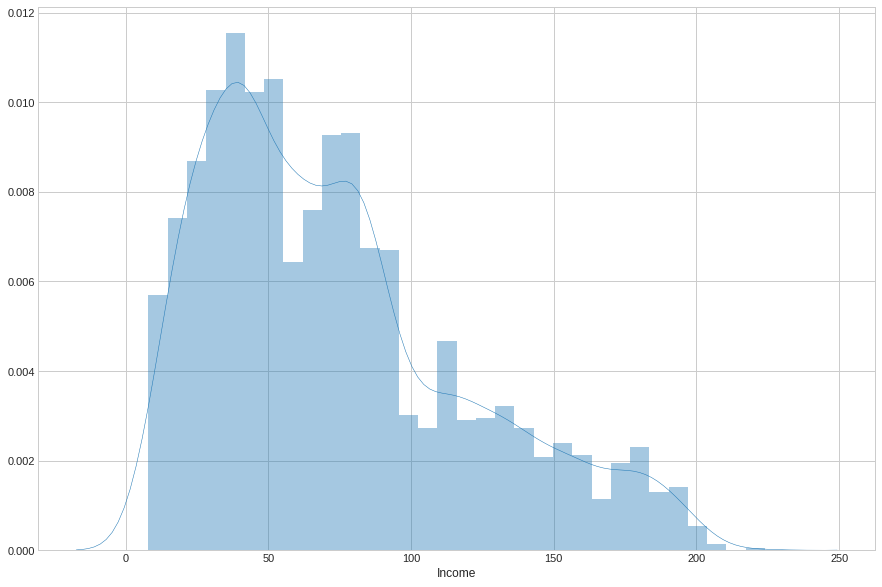

In [728]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(data['Income'])

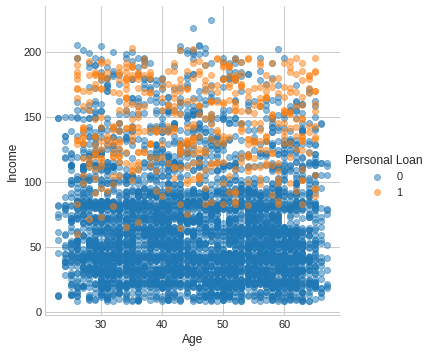

In [729]:
sns.lmplot(x='Age', y='Income', hue='Personal Loan', data=data, fit_reg=False, scatter_kws={'alpha':0.5});

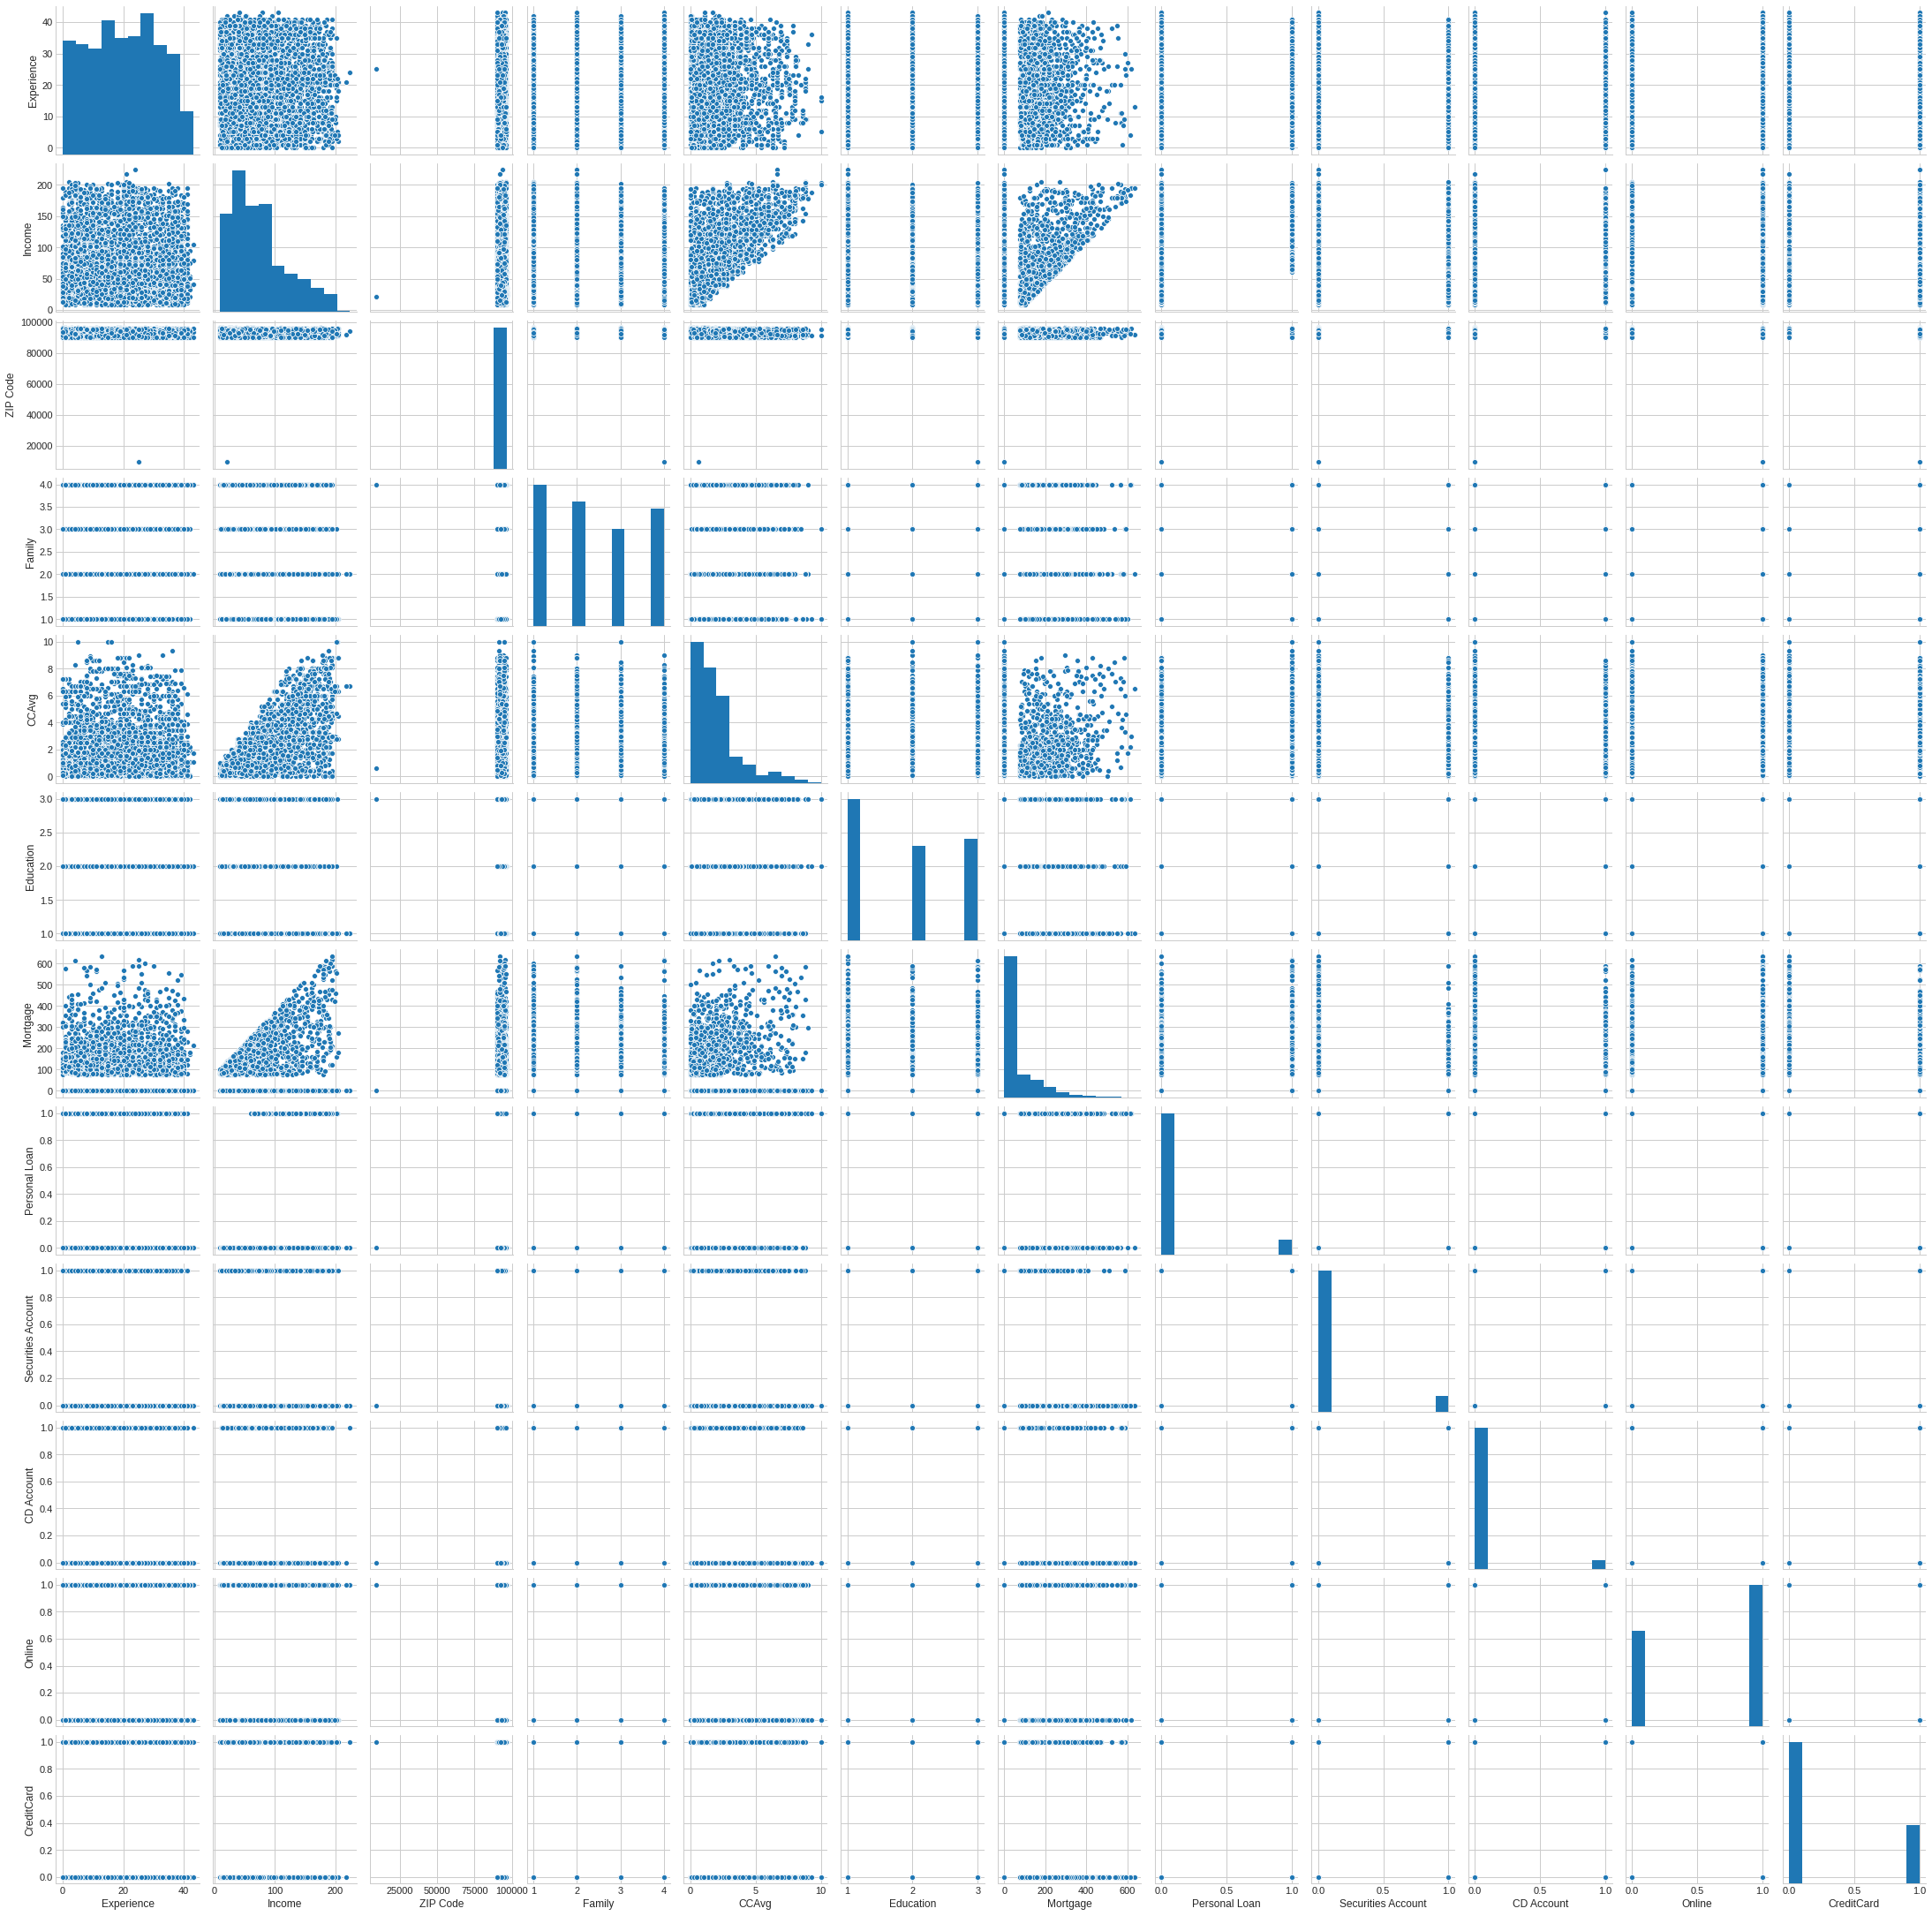

In [730]:
sns.pairplot(data.iloc[:,1:])

In [731]:
print('Number of people with zero mortgage:',len(data[data['Mortgage']==0]))

Number of people with zero mortgage: 3462


In [732]:
print('Number of people with zero Credit Card spending per month:', len(data[data['CCAvg']==0]))

Number of people with zero Credit Card spending per month: 106


In [733]:
data['CCAvg'].value_counts()

0.30    241
1.00    231
0.20    204
2.00    188
0.80    187
       ... 
2.75      1
8.20      1
9.30      1
3.67      1
5.33      1
Name: CCAvg, Length: 108, dtype: int64

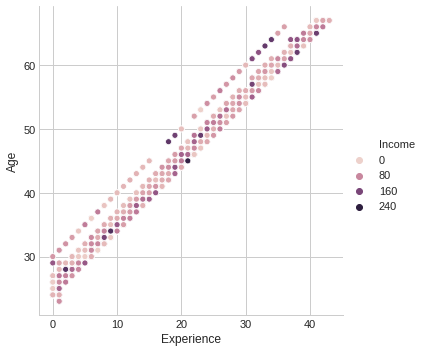

In [734]:
sns.relplot(x='Experience',y='Age', hue='Income', data=data) 

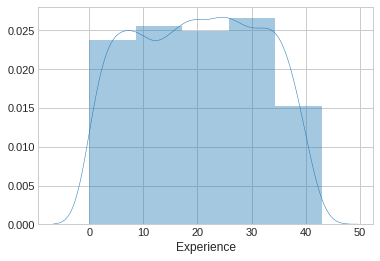

In [735]:
sns.distplot(data['Experience'],bins=5)

**Influence of income and Education on personal loan**

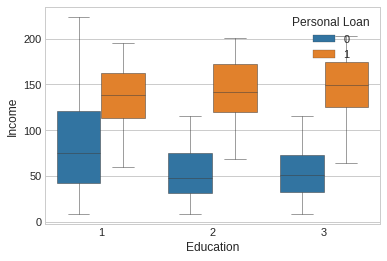

In [736]:
sns.boxplot(y="Income",x="Education",hue="Personal Loan", data=data)

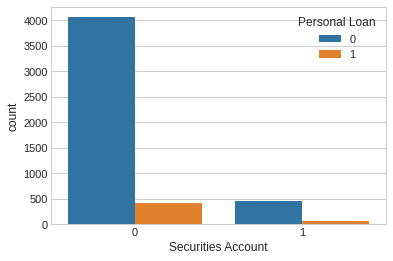

In [737]:
sns.countplot(x="Securities Account", data=data,hue="Personal Loan")

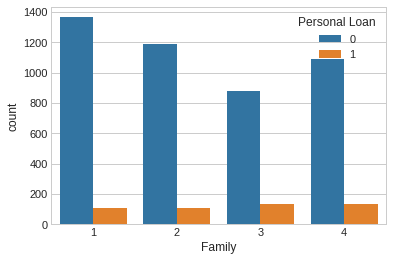

In [738]:
sns.countplot(x='Family',data=data,hue='Personal Loan')

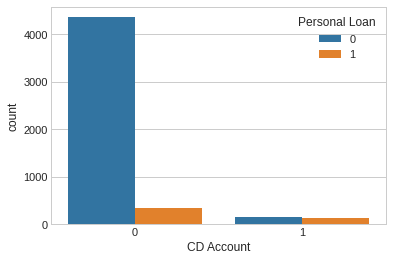

In [739]:
sns.countplot(x="CD Account", data=data, hue="Personal Loan")

Observation:- Majority of customer does not have "CD Account" and does not have loan. It also seem that almost all customer who have CD Account can also take loan.

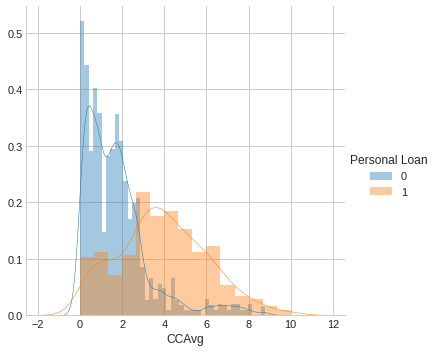

In [740]:
sns.FacetGrid(data , hue="Personal Loan", height=5) \
   .map(sns.distplot, "CCAvg") \
   .add_legend()
plt.show()

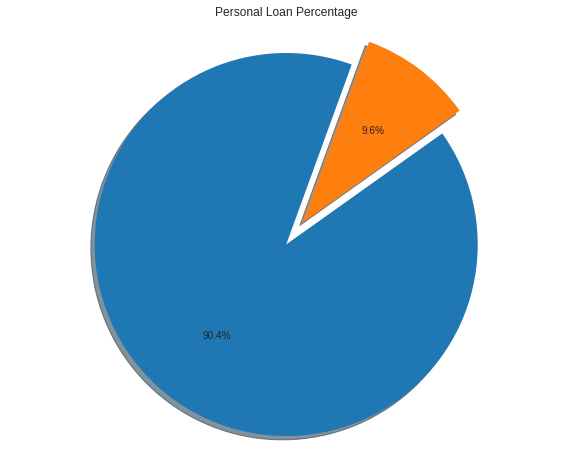

In [741]:
DF=pd.DataFrame(data['Personal Loan'].value_counts()).reset_index()
DF.columns=['Labels','Personal Loan']
fig1,ax1=plt.subplots(figsize=(10,8))
explode=(0,0.15)
ax1.pie(DF['Personal Loan'],explode=explode,autopct='%1.1f%%',shadow=True,startangle=70)
ax1.axis('equal')
plt.title('Personal Loan Percentage')
plt.show()


9.6% get approved for personal loans

**Correlation by HeatMap**

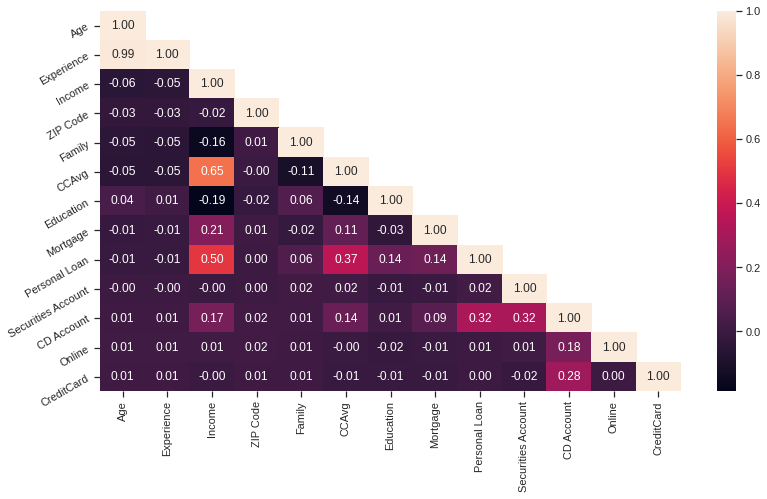

In [742]:
corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": .5})
plt.figure(figsize=(13,7))

# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

Observation:-

1) Income and CCAvg is moderately correlated.

2) Age and Experience is highly correlated


**Applying the Model Logistic Regression**

Split data into train and test

In [743]:
# Train test split
# We will drop the Age, ID columns from training as well as test dataset
X = data.iloc[:,2:-1]
X = data.drop(['Personal Loan'], axis=1)
y = data['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((3500, 12), (1500, 12), (3500,), (1500,))

In [744]:
log_reg.fit = LogisticRegression(C=1.0, max_iter=200 ,random_state=0)
# fit the model to training set
log_reg.fit.fit(X_train,y_train)
# Predict the test data to get y_pred
y_pred = log_reg.fit.predict(X_test)
# get accuracy of model
lr_acc_score = accuracy_score(y_test,y_pred)
# get F1-score of model
lr_f1_score = f1_score(y_test,y_pred) 
# get the confusion matrix
lr_confmat = confusion_matrix(y_test,y_pred)
# get the classification report
lr_classrep = classification_report(y_test,y_pred)

print("The accuracy of the model is {} %".format(lr_acc_score*100))
print("The f1-score of the model is {} %".format(lr_f1_score*100))
print("The confusion matrix for logistic regression is: \n",lr_confmat)
print("Detailed classification report for logistic regression is: \n",lr_classrep)

The accuracy of the model is 94.66666666666667 %
The f1-score of the model is 64.60176991150442 %
The confusion matrix for logistic regression is: 
 [[1347   25]
 [  55   73]]
Detailed classification report for logistic regression is: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1372
           1       0.74      0.57      0.65       128

    accuracy                           0.95      1500
   macro avg       0.85      0.78      0.81      1500
weighted avg       0.94      0.95      0.94      1500



Text(0.5, 1.0, 'Precision-Recall Curve for Logistic Regression')

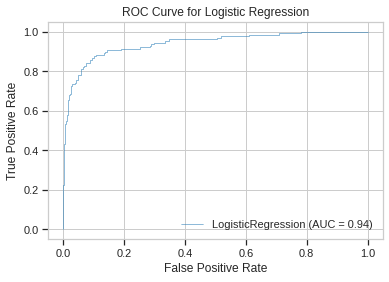

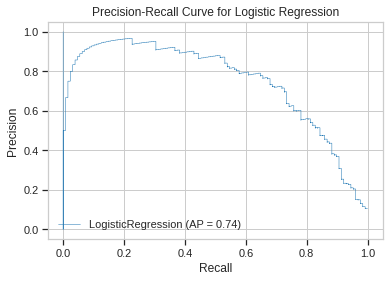

In [745]:
plot_roc_curve(log_reg, X_test, y_test)
plt.title('ROC Curve for Logistic Regression')

plot_precision_recall_curve(log_reg, X_test, y_test)
plt.title('Precision-Recall Curve for Logistic Regression')

Observations: One can see that although accuracy is good, f1-score is low in this case i.e., precision and recall values are not exactly upto the mark especially recall is low (.57) for class 1

Recall value of 57% means, out of all the customers who would actually buy the loan, only 57% were correctly predicted to be positive (would buy the personal loan) thus bank is missing on 43% of potential customers resulting in recampaigning cost

74% of precision value means out of all positively predicted customers (who would buy the personal loan) only 74% were correctly predicted.


**Applying the Model KNN**

In [746]:
X = data.iloc[:,2:-1]
X = data.drop(['Personal Loan'], axis=1)
y = data['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500, 12), (1500, 12), (3500,), (1500,))

In [747]:
plt.style.use('seaborn-whitegrid')
error_rate = []
for i in range(1,51):    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

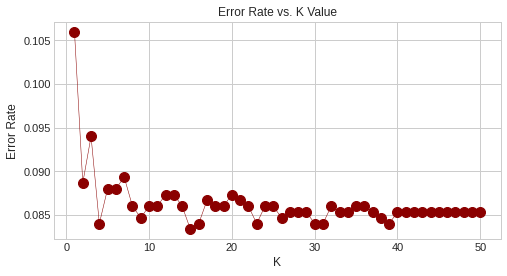

In [748]:
plt.figure(figsize=(8,4))
plt.plot(range(1,51),error_rate,color='darkred', marker='o',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [756]:
KNNModel = KNeighborsClassifier(n_neighbors=5) 
KNNModel.fit(X_train,y_train)
y_pred = KNNModel.predict(X_test)
knn_acc_score = accuracy_score(y_test,y_pred)
knn_f1_score = f1_score(y_test,y_pred) 
knn_confmat = confusion_matrix(y_test,y_pred)
knn_classrep = classification_report(y_test,y_pred)

print("The accuracy of the model is {} %".format(knn_acc_score*100))
print("The f1-score of the model is {} %".format(knn_f1_score*100))
print("The confusion matrix for K-NN classifier is: \n",knn_confmat)
print("Detailed classification report for K-NN classifier is: \n",knn_classrep)

The accuracy of the model is 91.2 %
The f1-score of the model is 35.92233009708738 %
The confusion matrix for K-NN classifier is: 
 [[1331   41]
 [  91   37]]
Detailed classification report for K-NN classifier is: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      1372
           1       0.47      0.29      0.36       128

    accuracy                           0.91      1500
   macro avg       0.71      0.63      0.66      1500
weighted avg       0.90      0.91      0.90      1500



**Applying the Model Naive Bayes**

In [758]:
X = data.iloc[:,2:-1]
X = data.drop(['Personal Loan'], axis=1)
y = data['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state =109)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
naive_model = GaussianNB()
naive_model.fit(X_train, y_train)
prediction = naive_model.predict(X_test)
naive_model_acc_score = accuracy_score(y_test,y_pred)
naive_model_f1_score = f1_score(y_test,y_pred) 
naive_model_confmat = confusion_matrix(y_test,y_pred)
naive_model_classrep = classification_report(y_test,y_pred)


print("The accuracy of the model is {} %".format(naive_model_acc_score*100))
print("The f1-score of the model is {} %".format(naive_model_f1_score*100))
print("The confusion matrix for SVM classifier is: \n",naive_model_confmat)
print("Detailed classification report for SVM classifier is: \n",naive_model_classrep)

The accuracy of the model is 86.0 %
The f1-score of the model is 6.25 %
The confusion matrix for SVM classifier is: 
 [[1283   71]
 [ 139    7]]
Detailed classification report for SVM classifier is: 
               precision    recall  f1-score   support

           0       0.90      0.95      0.92      1354
           1       0.09      0.05      0.06       146

    accuracy                           0.86      1500
   macro avg       0.50      0.50      0.49      1500
weighted avg       0.82      0.86      0.84      1500



**Applying the Model RandomForestClassifier**

In [759]:
X = data.iloc[:,2:-1]
X = data.drop(['Personal Loan'], axis=1)
y = data['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
rand_forest = RandomForestClassifier(criterion='entropy',n_estimators=50, max_depth=10,n_jobs=-1 )
rand_forest.fit(X_train, y_train)
y_pred=rand_forest.predict(X_test)
rand_forest_acc_score = accuracy_score(y_test,y_pred)
rand_forest_f1_score = f1_score(y_test,y_pred) 
rand_forest_confmat = confusion_matrix(y_test,y_pred)
rand_forest_classrep = classification_report(y_test,y_pred)
print("The accuracy of the model is {} %".format(rand_forest_acc_score*100))
print("The f1-score of the model is {} %".format(rand_forest_f1_score*100))
print("The confusion matrix for RandomForestClassifier  is: \n",rand_forest_confmat)
print("Detailed classification report for RandomForestClassifier  is: \n",rand_forest_classrep)

The accuracy of the model is 98.6 %
The f1-score of the model is 91.42857142857143 %
The confusion matrix for RandomForestClassifier  is: 
 [[1367    5]
 [  16  112]]
Detailed classification report for RandomForestClassifier  is: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1372
           1       0.96      0.88      0.91       128

    accuracy                           0.99      1500
   macro avg       0.97      0.94      0.95      1500
weighted avg       0.99      0.99      0.99      1500



Text(0.5, 1.0, 'Precision-Recall RandomForestClassifier')

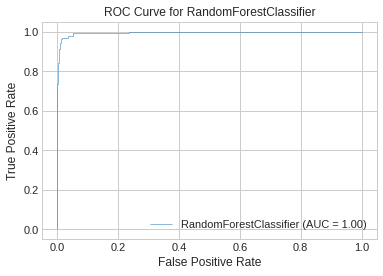

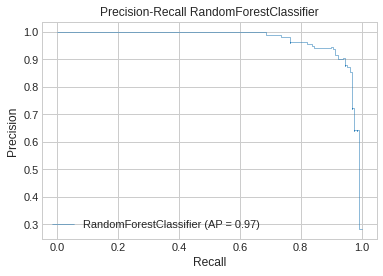

In [752]:
plot_roc_curve(rand_forest, X_test, y_test)
plt.title('ROC Curve for RandomForestClassifier')

plot_precision_recall_curve(rand_forest, X_test, y_test)
plt.title('Precision-Recall RandomForestClassifier')

**Applying the Model DecisionTreeClassifier**

In [753]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=0)
dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)
dtree_acc_score = accuracy_score(y_test,y_pred)
dtree_f1_score = f1_score(y_test,y_pred) 
dtree_confmat = confusion_matrix(y_test,y_pred)
dtree_classrep = classification_report(y_test,y_pred)
print("The accuracy of the model is {} %".format(dtree_acc_score*100))
print("The f1-score of the model is {} %".format(dtree_f1_score*100))
print("The confusion matrix for Decision Tree is: \n",dtree_confmat)
print("Detailed classification report for Decision Tree is: \n",dtree_classrep)


The accuracy of the model is 98.33333333333333 %
The f1-score of the model is 90.0398406374502 %
The confusion matrix for Decision Tree is: 
 [[1362   10]
 [  15  113]]
Detailed classification report for Decision Tree is: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1372
           1       0.92      0.88      0.90       128

    accuracy                           0.98      1500
   macro avg       0.95      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500



Text(0.5, 1.0, 'Precision-Recall Decision Tree')

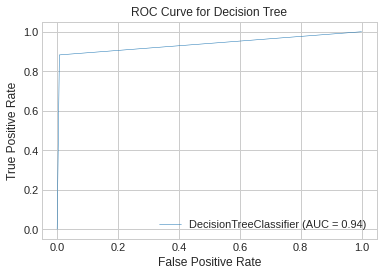

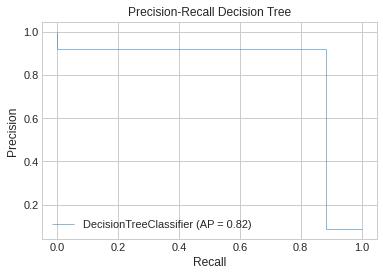

In [754]:
plot_roc_curve(dtree, X_test, y_test)
plt.title('ROC Curve for Decision Tree')

plot_precision_recall_curve(dtree, X_test, y_test)
plt.title('Precision-Recall Decision Tree')

In [761]:
df_comp = pd.DataFrame({'Classification Algorithm':['Logistic Regression','K-Nearest Neighbor','naive bayes','RandomForestClassifier','DecisionTreeClassifie' ],'Accuracy (%)':[lr_acc_score*100,knn_acc_score*100,naive_model_acc_score*100,rand_forest_acc_score*100,dtree_acc_score*100],'f1-score (%)':[lr_f1_score*100,knn_f1_score*100,naive_model_f1_score*100,rand_forest_f1_score*100,dtree_f1_score*100]})
df_comp

,Classification Algorithm,Accuracy (%),f1-score (%)
0,Logistic Regression,94.666667,64.601770
1,K-Nearest Neighbor,91.200000,35.922330
2,naive bayes,86.000000,6.250000
3,RandomForestClassifier,98.600000,91.428571
4,DecisionTreeClassifie,98.333333,90.039841


we get the best result from the random forest classifier.